In [1]:
import pandas as pd
import numpy as np

In [2]:
data_1=pd.read_excel("AF4_NEW.xlsx")

In [3]:
data_2=pd.read_excel("T7_NEW.xlsx")

In [4]:
data_3=pd.read_excel("T8_NEW.xlsx")

In [5]:
data=pd.read_excel("AF3_NEW.xlsx")

In [6]:
data_4=pd.read_excel("PZ_NEW.xlsx")

In [7]:
frames = [data, data_1,data_2,data_3,data_4]

data_f = pd.concat(frames)

In [8]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70060 entries, 0 to 14011
Columns: 445 entries, Unnamed: 1 to New Column
dtypes: float64(444), object(1)
memory usage: 238.4+ MB


In [9]:
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 436,Unnamed: 437,Unnamed: 438,Unnamed: 439,Unnamed: 440,Unnamed: 441,Unnamed: 442,Unnamed: 443,Unnamed: 444,New Column
0,4272.307692,4271.282051,4264.102564,4256.923077,4265.128205,4273.333333,4264.102564,4255.384615,4260.000000,4267.692308,...,4278.199841,4278.199841,4278.199841,4278.199841,4278.199841,4278.199841,4278.199841,4278.199841,4278.199841,n00007846
1,4234.358974,4228.717949,4207.692308,4205.128205,4232.820513,4252.307692,4237.948718,4224.102564,4236.923077,4253.333333,...,4246.903251,4246.903251,4246.903251,4246.903251,4246.903251,4246.903251,4246.903251,4246.903251,4246.903251,n00007846
2,4309.230769,4290.769231,4292.820513,4293.846154,4296.410256,4308.205128,4299.487179,4288.717949,4294.871795,4305.128205,...,4294.950588,4294.950588,4294.950588,4294.950588,4294.950588,4294.950588,4294.950588,4294.950588,4294.950588,n00007846
3,4376.923077,4378.974359,4377.948718,4370.256410,4364.102564,4359.487179,4356.410256,4359.487179,4356.410256,4350.256410,...,4323.951890,4323.951890,4323.951890,4323.951890,4323.951890,4323.951890,4323.951890,4323.951890,4323.951890,n00007846
4,4250.769231,4257.435897,4254.871795,4272.307692,4259.487179,4224.102564,4236.410256,4242.564103,4208.717949,4211.282051,...,4266.225962,4266.225962,4266.225962,4266.225962,4266.225962,4266.225962,4266.225962,4266.225962,4266.225962,n00007846


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


X=np.asarray(data_f.values)
X=np.asarray(X[:,:-1])
X=X.astype(float)

dt=np.asarray(data_f.values)
Y=np.asarray(dt[: , -1]) #not working for string type label

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
le = LabelEncoder()
le.fit(y_train)
Y_train = le.transform(y_train)
Y_test = le.transform(y_test)

In [14]:
Y_train.shape,Y_test.shape

((56048,), (14012,))

In [15]:
#Electrodes dataset
#X=X.reshape(14012, 444,1)
X=X.reshape(70060, 444,1)

print(X.shape)

(70060, 444, 1)


In [16]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((56048, 444), (56048,), (14012, 444), (14012,))

In [17]:
# ONLY 2 LAYERS........
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
import numpy as np
from keras.models import Sequential
#from keras.utils import np_utils
from keras.layers import Dense, Activation,Conv1D,MaxPooling1D, Dropout, Flatten,GlobalAveragePooling1D
import pandas as pd

import matplotlib.pyplot as plt

model = Sequential()

#model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(178,1)))  # data EEG
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(444,1)))   # haus dataset
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(11209, 444)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Flatten())
#model.add(GlobalAveragePooling1D())

#model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(569, activation='softmax'))
model.add(Dropout(0.2))
#model.add(Dense(569, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))# caterogorical_crossentropy
#model.add(Dense(569, activation='sigmoid'))  # binary_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
#model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

history=model.fit(X_train,Y_train,100,10,verbose=1,shuffle=True,validation_data=(X_test,Y_test))


scores = model.evaluate(X_test, Y_test, verbose=0, batch_size=200)
pred=model.predict(X_test, verbose=0, batch_size=200)
pred=np.round(pred)
#print(classification_report(Y_test, pred))
#f1=precision_recall_fscore_support(Y_test, pred, average='micro')

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 443, 128)          384       
                                                                 
 conv1d_1 (Conv1D)           (None, 442, 128)          32896     
                                                                 
 max_pooling1d (MaxPooling1  (None, 221, 128)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 221, 128)          0         
                                                                 
 flatten (Flatten)           (None, 28288)             0         
                                                                 
 dense (Dense)               (None, 1000)              28289000  
                                                        

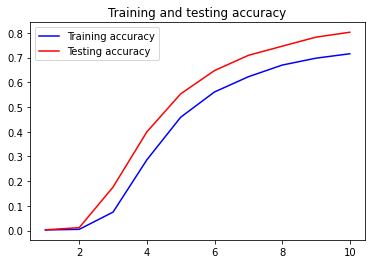

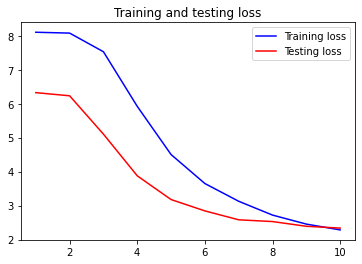

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from plot_conf_matr import plot_confusion_matrix

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Testing accuracy')
plt.title('Training and testing accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and testing loss')
plt.legend()
plt.savefig('Loss.jpg')